## Credit scoring

Task in russian

**1** Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?
    
**2** Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)
    
**3** Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг.  Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?
    
**4** Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.
    
**5** Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

By default $\alpha$ = 0.05

In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

import itertools

In [2]:
SEED = 42
ALPHA = 0.05

In [3]:
df = pd.read_csv('credit_card_default_analysis.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df0 = df[df['default']==0]
df1 = df[df['default']==1]

### 1

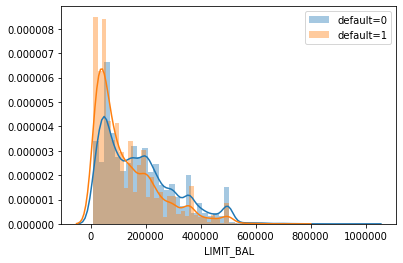

In [5]:
sns.distplot(df0['LIMIT_BAL'], label='default=0')
sns.distplot(df1['LIMIT_BAL'], label='default=1')
plt.legend(loc='best')
plt.show()

In [6]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stats_boost, alpha, method='percentile', true_stat=None):
    
    if method not in ['percentile', 'perc', 'empirical', 'empir']:
        raise ValueError('Using non availiable method')
    
    if method in ['empirical', 'empir'] and true_stat is None:
        raise ValueError('Attempt of calculating CI using empirical bootstrap without giving true statistics\
        on original sample. true_stat must be given!')
    
    if method in ['percentile', 'perc']:
        boundaries = np.percentile(stats_boost, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    else:
        z = stats.norm.ppf(1-ALPHA/2)
        std = np.std(stats_boost, ddof=1)
        boundaries = (true_stat - z*std, true_stat + z*std)
    return boundaries

column LIMIT_BAL

a)
<br>
$H_0:med(X_1) = med(X_2)$
<br>
$H_1:med(X_1) \neq med(X_2)$

Since need to compare medians I'll use bootstrap
<br>
I'd like also to compare percentile and emperical bootstrap

In [7]:
med0 = df.loc[df['default']==0, 'LIMIT_BAL'].median()
med1 = df.loc[df['default']==1, 'LIMIT_BAL'].median()
print(f"true medians in sample 0: {med0} and sample 1: {med1}")

true medians in sample 0: 150000.0 and sample 1: 90000.0


In [8]:
np.random.seed(SEED)

medians0 = list(map(np.median, get_bootstrap_samples(df0['LIMIT_BAL'].values, 1000)))
medians1 = list(map(np.median, get_bootstrap_samples(df1['LIMIT_BAL'].values, 1000)))

In [9]:
print(f"CI for median in 0 group via perc bootstrap: {stat_intervals(medians0, ALPHA)}")
print(f"CI for median in 1 group via perc bootstrap: {stat_intervals(medians1, ALPHA)}")

CI for median in 0 group via perc bootstrap: [150000. 150000.]
CI for median in 1 group via perc bootstrap: [80000. 90000.]


In [10]:
print(f"CI for median in 0 group via empir bootstrap: {stat_intervals(medians0, ALPHA, 'empir', med0)}")
print(f"CI for median in 1 group via empir bootstrap: {stat_intervals(medians1, ALPHA, 'empir', med1)}")

CI for median in 0 group via empir bootstrap: (148927.55864321944, 151072.44135678056)
CI for median in 1 group via empir bootstrap: (85883.93082619597, 94116.06917380403)


As I expected we can conduct the same from both of them.

Conclusion: a) $H_0$ is rejected (result is significant) since CI are not crossed

b)

$H_0: F_{X_1}(x) = F_{X_2}(x)$
<br>
$H_1: F_{X_1}(x) = F_{X_2}(x+\delta), \delta \neq 0$

Let's check using test based on permutations and test Mann-Whitneyu

In [11]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    
    n1 = len(sample1)
    n2 = len(sample2)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, n2, max_combinations)
    else:
        indices = [(list(index), list(filter(lambda i: i not in index, range(n))) \
                   ) for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

_Mann-Whitneyu_

In [12]:
print(stats.mannwhitneyu(df0['LIMIT_BAL'], df1['LIMIT_BAL']))

MannwhitneyuResult(statistic=59257217.5, pvalue=6.127742909111652e-190)


https://ru.wikipedia.org/wiki/U-критерий_Манна_—_Уитни

**By that link we can get that it's not correct to use mannwhitney criterion when there're lots of equal elements in sample, so it's more preferable to use permutated criterion**

In [13]:
un1, un2 = df0['LIMIT_BAL'].unique(), df1['LIMIT_BAL'].unique()
print(f"Number of elems in arrays: {un1.shape[0]}, {un2.shape[0]}")
print(f"Number of equal elems: {len(set(un1) & set(un2))}")

Number of elems in arrays: 80, 65
Number of equal elems: 64


_Criterion based on permutations_

In [14]:
print(f"p-value={permutation_test(df0['LIMIT_BAL'], df1['LIMIT_BAL'], max_permutations=500)}")

p-value=0.002


Conclusion: b) $H_0$ is rejected (result is significant)

**Common conclusion:** we can see that a feature LIMIT_BAL is significant based on practical siginificance

### 2

In [15]:
def matthews_corr(a, b, c, d):
    """
    Parameters:
        ---------------
        |X1\X2| 0 | 1 |
        |--------------
        |  0  | a | b |
        |  1  | c | d |
        ---------------
    
    Return:
        Matthews' correlation
    
    """
    numerator = a*d - b*c
    denominator = np.sqrt((a+b)*(a+c)*(b+d)*(c+d))
    return numerator / denominator

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

def proportions_diff_z_stat_ind(n1=None, n2=None, cnt_pos1=None, cnt_pos2=None,
                                p1=None, p2=None, sample1=None, sample2=None):
    if sample1 is not None:
        n1 = len(sample1)
        cnt_pos1 = sum(sample1)
        #подсчет вероятноти для 1-й популяции
        p1 = cnt_pos1 / n1
    elif n1 is not None and cnt_pos1 is not None:
        p1 = cnt_pos1 / n1
    else:
        assert(n1 is not None) , 'You give no sample, no cnt_pos1, so it must be p1 and n1'
        
    if sample2 is not None:
        n2 = len(sample2)
        cnt_pos2 = sum(sample2)
        #подсчет вероятноти для 2-й популяции
        p2 = cnt_pos2 / n2
    elif n2 is not None and cnt_pos2 is not None:
        p2 = cnt_pos2 / n2
    else:
        assert(n1 is not None) , 'You give no sample, no cnt_pos1, so it must be p1 and n1'
        
    P = (p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))



In [25]:
subtable = pd.crosstab(df['SEX'], df['default'])
#or the same
#subtable = df.pivot_table(index='SEX', values="LIMIT_BAL", columns='default', aggfunc = len, fill_value=0)
subtable

default,0,1
SEX,,
1,9015,2873
2,14349,3763


In [294]:
a = subtable[subtable.index.get_level_values('SEX')==1][0].values[0]
b = subtable[subtable.index.get_level_values('SEX')==1][1].values[0]
c = subtable[subtable.index.get_level_values('SEX')==2][0].values[0]
d = subtable[subtable.index.get_level_values('SEX')==2][1].values[0]
print(a, b, c, d)

9015 2873 14349 3763


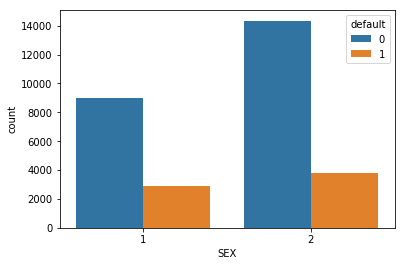

In [295]:
stacked = subtable.stack().reset_index().rename(columns={0:'count'})
sns.barplot(x=stacked['SEX'], y=stacked['count'], hue=stacked['default'])
#or subtable.plot.bar(rot=0)
plt.show()

**Check if sex impact on returning debt or not**

By hand:

In [111]:
vals = [a, b, c, d]
matt_corr = matthews_corr(*vals)
n = np.sum(vals)
mcc_stat = n * (matthews_corr(*vals))**2
print(f"Stat={mcc_stat}, p-value={2*(1-stats.chi2.cdf(abs(mcc_stat), df=1))}")

Stat=47.90543311657907, p-value=8.945510998614736e-12


Using $\chi^2$

In [112]:
mcc_stat2, pval = stats.chi2_contingency([[a, b], [c, d]])[:2]
print(f"Stat={mcc_stat2}, p-value={pval}")

Stat=47.70879689062111, p-value=4.944678999412044e-12


Let's check fraction of men that returned and didn't return debt and compare them using **Wilson's CI**

In [297]:
from statsmodels.stats.proportion import proportion_confint

In [303]:
frac0 =  a / (a+c)
frac1 =  b / (b+d)
print(f"frac1={frac0}, frac2={frac1}")

frac1=0.38585002568053417, frac2=0.43294153104279687


i like wilson's conf int but in this case it seems that it doesn't matter wilson or normal since probabilities is quite big

In [302]:
print(f"CI Wilson fot strategy #1 {proportion_confint(a, a+c, method = 'wilson')}")
print(f"CI Wilson fot strategy #2 {proportion_confint(b, b+d, method = 'wilson')}")

CI Wilson fot strategy #1 (0.3796273158089251, 0.392110265969876)
CI Wilson fot strategy #2 (0.421062418034934, 0.4448982369717182)


Based on Wilson's CI we can make a conclusion that fraction of men is less in a group who didn't return debt.

It also means I guess that gender group members are different between groups who didn't return debt (default=1) and who return debt (default=0)

Let's also use **z-test for fractions for independent samples**

In [310]:
z_stat = proportions_diff_z_stat_ind(n1=a+c, n2=b+d, cnt_pos1=a, cnt_pos2=b)
print(f"z-test for independent fraction p-value={proportions_diff_z_test(z_stat)}")

z-test for independent fraction p-value=4.472866521609831e-12


### 3

$H_0:$ education doesn't impact on default (returning debt)
<br> it's the same that $H_0:$ V Cramer corr = 0 

In [15]:
##data.pivot_table(values='ID', index='EDUCATION', columns='default', aggfunc='count')
subtable = pd.crosstab(df['EDUCATION'], df['default'])
subtable

default,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


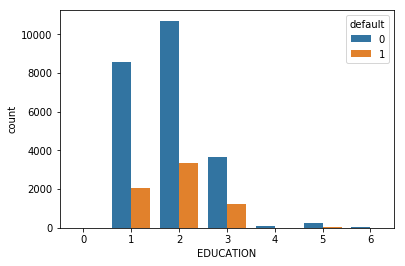

In [16]:
stacked = subtable.stack().reset_index().rename(columns={0:'count'})
sns.barplot(x=stacked['EDUCATION'], y=stacked['count'], hue=stacked['default'])
plt.show()

In [17]:
k1 = df['EDUCATION'].unique().shape[0]
k2 = df['default'].unique().shape[0]

stat_p = stats.chi2_contingency(subtable)[:2]
n = df.shape[0] #==sum(df.groupby(by=['EDUCATION'])['default'].count().values)
v_cram_corr = np.sqrt(stat_p[0]/(n * (min(k1,k2)-1)))
print(f"cramer's V corr={v_cram_corr}, stat={stat_p[0]}, p-value={stat_p[1]}")

cramer's V corr=0.07376009713252163, stat=163.21655786997073, p-value=1.2332626245415605e-32


In [18]:
subtable

default,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


Let's calculate $P_i = \frac{m}{n}$, where $m$ - number of returning credits (default=0), $n$ - number of taken debts
$i$ - id of education.

In [19]:
print(stacked[stacked['default']==0].groupby(by=['EDUCATION'])['count'].sum() / 
      stacked.groupby(by=['EDUCATION'])['count'].sum())

EDUCATION
0    1.000000
1    0.807652
2    0.762651
3    0.748424
4    0.943089
5    0.935714
6    0.843137
Name: count, dtype: float64


In [20]:
chi2_stat = stats.chi2_contingency(subtable)[0]
subtable_exp = stats.chi2_contingency(subtable)[3]

Plor corrplot of remainders (==heatmap i guess) using this [link](http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/120-correspondence-analysis-theory-and-practice/#chi-square-test)

0-5 is about level of education (0 is the highest), 6 - there're no data about of education of people.

I guess that the highest probability that a person return debt is the persons with level of education 0,4,5 and the smalest one it's the persons with education's level 2 and 3

So in general education impacts on returning debt

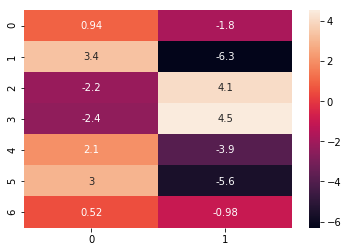

In [23]:
r = (subtable.values - subtable_exp) / np.sqrt(subtable_exp)
sns.heatmap(r , annot=True)
plt.show()

### 4

In [248]:
subtable = pd.crosstab(df['MARRIAGE'], df['default'])
subtable

default,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


MARRIAGE:
    
    0 - a person refused to give an answer
    1 - married
    2 - single
    3 - there're no data

In [277]:
k1 = df['MARRIAGE'].unique().shape[0]
k2 = df['default'].unique().shape[0]

stat_p = stats.chi2_contingency(subtable)[:2]
n = df.shape[0] #==sum(df.groupby(by=['EDUCATION'])['default'].count().values)
v_cram_corr = np.sqrt(stat_p[0]/(n * (min(k1,k2)-1)))
print(f"cramer's V corr={v_cram_corr}, stat={stat_p[0]}, p-value={stat_p[1]}")

cramer's V corr=0.030281682633212386, stat=27.5094090929579, p-value=1.5633210355976673e-07


Since we have to measure correlation between 'marriage' and 'default'. I suppose we should drop instances where marriage in (0, 3) and check corr on the known data

What if we'll treat both of variables as binary ones and use matthews corr

In [268]:
df_marr = df[df['MARRIAGE'].isin([1,2])]

In [273]:
subtable = pd.crosstab(df_marr['MARRIAGE'], df_marr['default'])
subtable

default,0,1
MARRIAGE,,
1,10453,3206
2,12623,3341


In [274]:
a = subtable[subtable.index.get_level_values('MARRIAGE')==1][0].values[0]
b = subtable[subtable.index.get_level_values('MARRIAGE')==1][1].values[0]
c = subtable[subtable.index.get_level_values('MARRIAGE')==2][0].values[0]
d = subtable[subtable.index.get_level_values('MARRIAGE')==2][1].values[0]
print(a, b, c, d)

10453 3206 12623 3341


In [275]:
print(f"Matthews corr={matthews_corr(*[a,b,c,d])}")

Matthews corr=-0.030555369920445503


In [276]:
mcc_stat2, pval = stats.chi2_contingency([[a, b], [c, d]])[:2]
print(f"Stat={mcc_stat2}, p-value={pval}")

Stat=27.5094090929579, p-value=1.5633210355976673e-07


Well, we get that there's a bit correlation between marriage status and default value, but it's really small I guess.

Based on both of correlations (V Cramer and Matthews) I'd like to say that marriage status means smth about returning debts and there's some correlation

### 5

column AGE

a)
<br>
$H_0:med(X_1) = med(X_2)$
<br>
$H_1:med(X_1) \neq med(X_2)$

Since need to compare medians I'll use percentile bootstrap

In [288]:
med0 = df.loc[df['default']==0, 'AGE'].median()
med1 = df.loc[df['default']==1, 'AGE'].median()
print(f"true medians in sample 0: {med0} and sample 1: {med1}")

true medians in sample 0: 34.0 and sample 1: 34.0


In [251]:
np.random.seed(SEED)

medians0 = list(map(np.median, get_bootstrap_samples(df0['AGE'].values, 1000)))
medians1 = list(map(np.median, get_bootstrap_samples(df1['AGE'].values, 1000)))

In [252]:
print(f"CI for median in 0 group via perc bootstrap: {stat_intervals(medians0, ALPHA)}")
print(f"CI for median in 1 group via perc bootstrap: {stat_intervals(medians1, ALPHA)}")

CI for median in 0 group via perc bootstrap: [34. 34.]
CI for median in 1 group via perc bootstrap: [34. 35.]


Since they are crossed let's look at difference of medians

In [263]:
delta_median_scores = list(map(lambda x: x[0] - x[1], zip(medians0, medians1)))
print(f"95% confidence interval for the difference between medians: {stat_intervals(delta_median_scores, ALPHA)}")

95% confidence interval for the difference between medians: [-1.  0.]


a) Conclusion: well, since there's zero value in CI $H_0$ cannnot be rejected

b)

$H_0: F_{X_1}(x) = F_{X_2}(x)$
<br>
$H_1: F_{X_1}(x) = F_{X_2}(x+\delta), \delta \neq 0$

Let's check using test based on permutations

In [283]:
print(f"p-value={permutation_test(df0['AGE'], df1['AGE'], max_permutations=500)}")

p-value=0.026


Conclusion: b) $H_0$ is rejected

Let's look at the distributions of these 2 groups

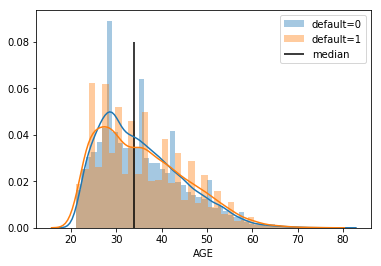

In [290]:
sns.distplot(df0['AGE'], label='default=0')
sns.distplot(df1['AGE'], label='default=1')
plt.vlines(med0, 0, 0.08, label='median')
plt.legend(loc='best')
plt.show()

Well, in sample where default=0 we can observe 2 peaks that are strongly higher than every column of sample where default=1.

I guess that cos of that we have rejected $H_0$ on comparing 2 distributions but not rejected $H_0$ on comparing 2 medians

So I don't see any practical significance based on these hypotheses about age and dependency of it and returning debt in this case but if we look at quantile I suppose we can discover some differences.

So to sum up it's just a case of particular data and in general this feature is important